In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1: Biggest predictor of CO2 output




In [56]:
# Reading in Data
emissions_df = 'annual-co2-emissions-per-country.csv'
capita_df = 'co-emissions-per-capita.csv'
gdp_df = 'gdp-per-capita-maddison-2020.csv'
energy_df = 'per-capita-energy-source-stacked.csv'
land_use_df = 'global-co2-fossil-plus-land-use.csv'
cars_per1000_df = 'road-motor-vehicle-ownership-per-1000-people-2014.csv'
cost_df = 'levelized-cost-of-energy.csv'
food_foot_print_df = 'food-footprints.csv'

In [58]:
emissions = pd.read_csv(emissions_df)
capita = pd.read_csv(capita_df)
gdp = pd.read_csv(gdp_df)
energy = pd.read_csv(energy_df)
cars = pd.read_csv(cars_per1000_df)
cost = pd.read_csv(cost_df)
land_use = pd.read_csv(land_use_df)
food_print = pd.read_csv(food_foot_print_df)



In [52]:
land_use

,Entity,Code,Year,Annual CO₂ emissions,Annual CO₂ emissions including land-use change,Annual CO₂ emissions from land-use change
0,Afghanistan,AFG,1850,NaN,NaN,2931200.0
1,Afghanistan,AFG,1851,NaN,NaN,2967840.0
2,Afghanistan,AFG,1852,NaN,NaN,2967840.0
3,Afghanistan,AFG,1853,NaN,NaN,3004480.0
4,Afghanistan,AFG,1854,NaN,NaN,3004480.0
...,...,...,...,...,...,...
42599,Zimbabwe,ZWE,2017,9596071.0,19085832.0,9489760.0
42600,Zimbabwe,ZWE,2018,11795478.0,20625718.0,8830240.0
42601,Zimbabwe,ZWE,2019,11114607.0,19431888.0,8317280.0
42602,Zimbabwe,ZWE,2020,10607897.0,18485496.0,7877600.0


In [59]:
food_print



,Entity,Code,Year,"GHG emissions per kilogram (Poore & Nemecek, 2018)"
0,Apples,NaN,2010,0.43
1,Bananas,NaN,2010,0.86
2,Barley,NaN,2010,1.18
3,Beef (beef herd),NaN,2010,99.48
4,Beef (dairy herd),NaN,2010,33.30
5,Beet Sugar,NaN,2010,1.81
6,Berries & Grapes,NaN,2010,1.53
7,Brassicas,NaN,2010,0.51
8,Cane Sugar,NaN,2010,3.20
9,Cassava,NaN,2010,1.32


In [79]:
# Merging Data
emissions_capita = pd.merge(emissions, capita, on=['Entity', 'Code', 'Year'])
emissions_capita_gdp = pd.merge(emissions_capita, gdp, on=['Entity', 'Code', 'Year'])
energy_cars = pd.merge(energy, cars, on=['Entity', 'Code', 'Year'])

emissions_capita_gdp.drop(columns = ["417485-annotations", "Code"], inplace = True)
energy_cars.drop(columns = 'Code', inplace = True)

land_use_food = pd.merge(food_print, land_use, on=[ 'Year',])
land_use_food.drop(columns=['Entity_y', 'Code_x', 'Code_y'], inplace=True)


new_land_use_df=land_use_food[land_use_food['Year'].astype(str).str.contains('2010')]
     


In [69]:
new_land_use_df

,Entity_x,Year,"GHG emissions per kilogram (Poore & Nemecek, 2018)",Annual CO₂ emissions,Annual CO₂ emissions including land-use change,Annual CO₂ emissions from land-use change
0,Apples,2010,0.43,8.364804e+06,8.877764e+06,5.129600e+05
1,Apples,2010,0.43,1.214749e+09,3.488943e+09,2.274648e+09
2,Apples,2010,0.43,1.214738e+09,NaN,NaN
3,Apples,2010,0.43,NaN,NaN,-3.664000e+04
4,Apples,2010,0.43,4.783865e+06,5.443385e+06,6.595200e+05
...,...,...,...,...,...,...
9875,Wine,2010,1.79,NaN,NaN,0.000000e+00
9876,Wine,2010,1.79,3.336435e+10,3.820205e+10,4.837701e+09
9877,Wine,2010,1.79,2.315059e+07,2.260099e+07,-5.496000e+05
9878,Wine,2010,1.79,3.120300e+06,1.163745e+08,1.132542e+08


In [72]:
df = pd.merge(emissions_capita_gdp, energy_cars, on=['Entity', 'Year'])
new_df= df[df['Year'].astype(str).str.contains('2014')]

new_df.columns = ['Country', 'Year', 'Annual_co2', 'Annual_co2_per_cap', 'GDP_per_cap', 'Fossil_per_cap', 'Nuclear_per_cap', 'Renewable_per_cap', 'Cars_per_1000']

In [ ]:
new_df

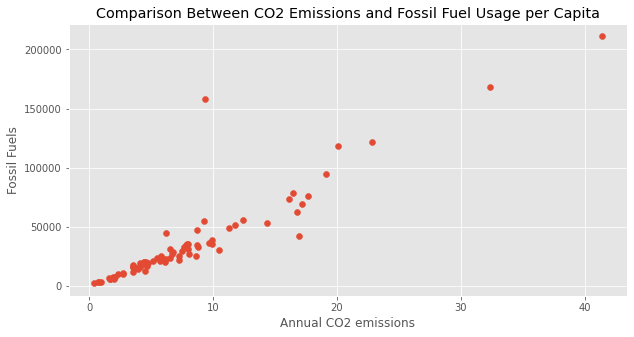

In [43]:
plt.style.use('ggplot')

x = new_df.iloc[:, 3]
y =  new_df.iloc[:, -4]


plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.ylabel("Fossil Fuels (kWh)")
plt.xlabel("Annual CO2 emissions")
plt.title("Comparison Between CO2 Emissions and Fossil Fuel Usage per Capita")
plt.show()

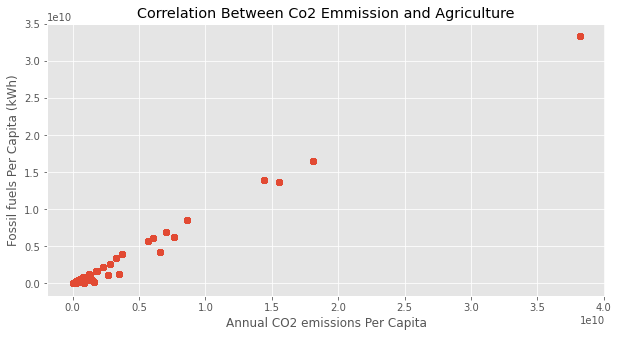

In [81]:
x = new_land_use_df.iloc[:, 4]
y = new_land_use_df.iloc[:, 3]


# plt.subplots()

plt.figure(figsize=(10,5))
plt.scatter(x,y)

plt.ylabel("Fossil fuels Per Capita (kWh)")
plt.xlabel("Annual CO2 emissions Per Capita")
plt.title("Correlation Between Co2 Emmission and Agri Land use")
plt.show()

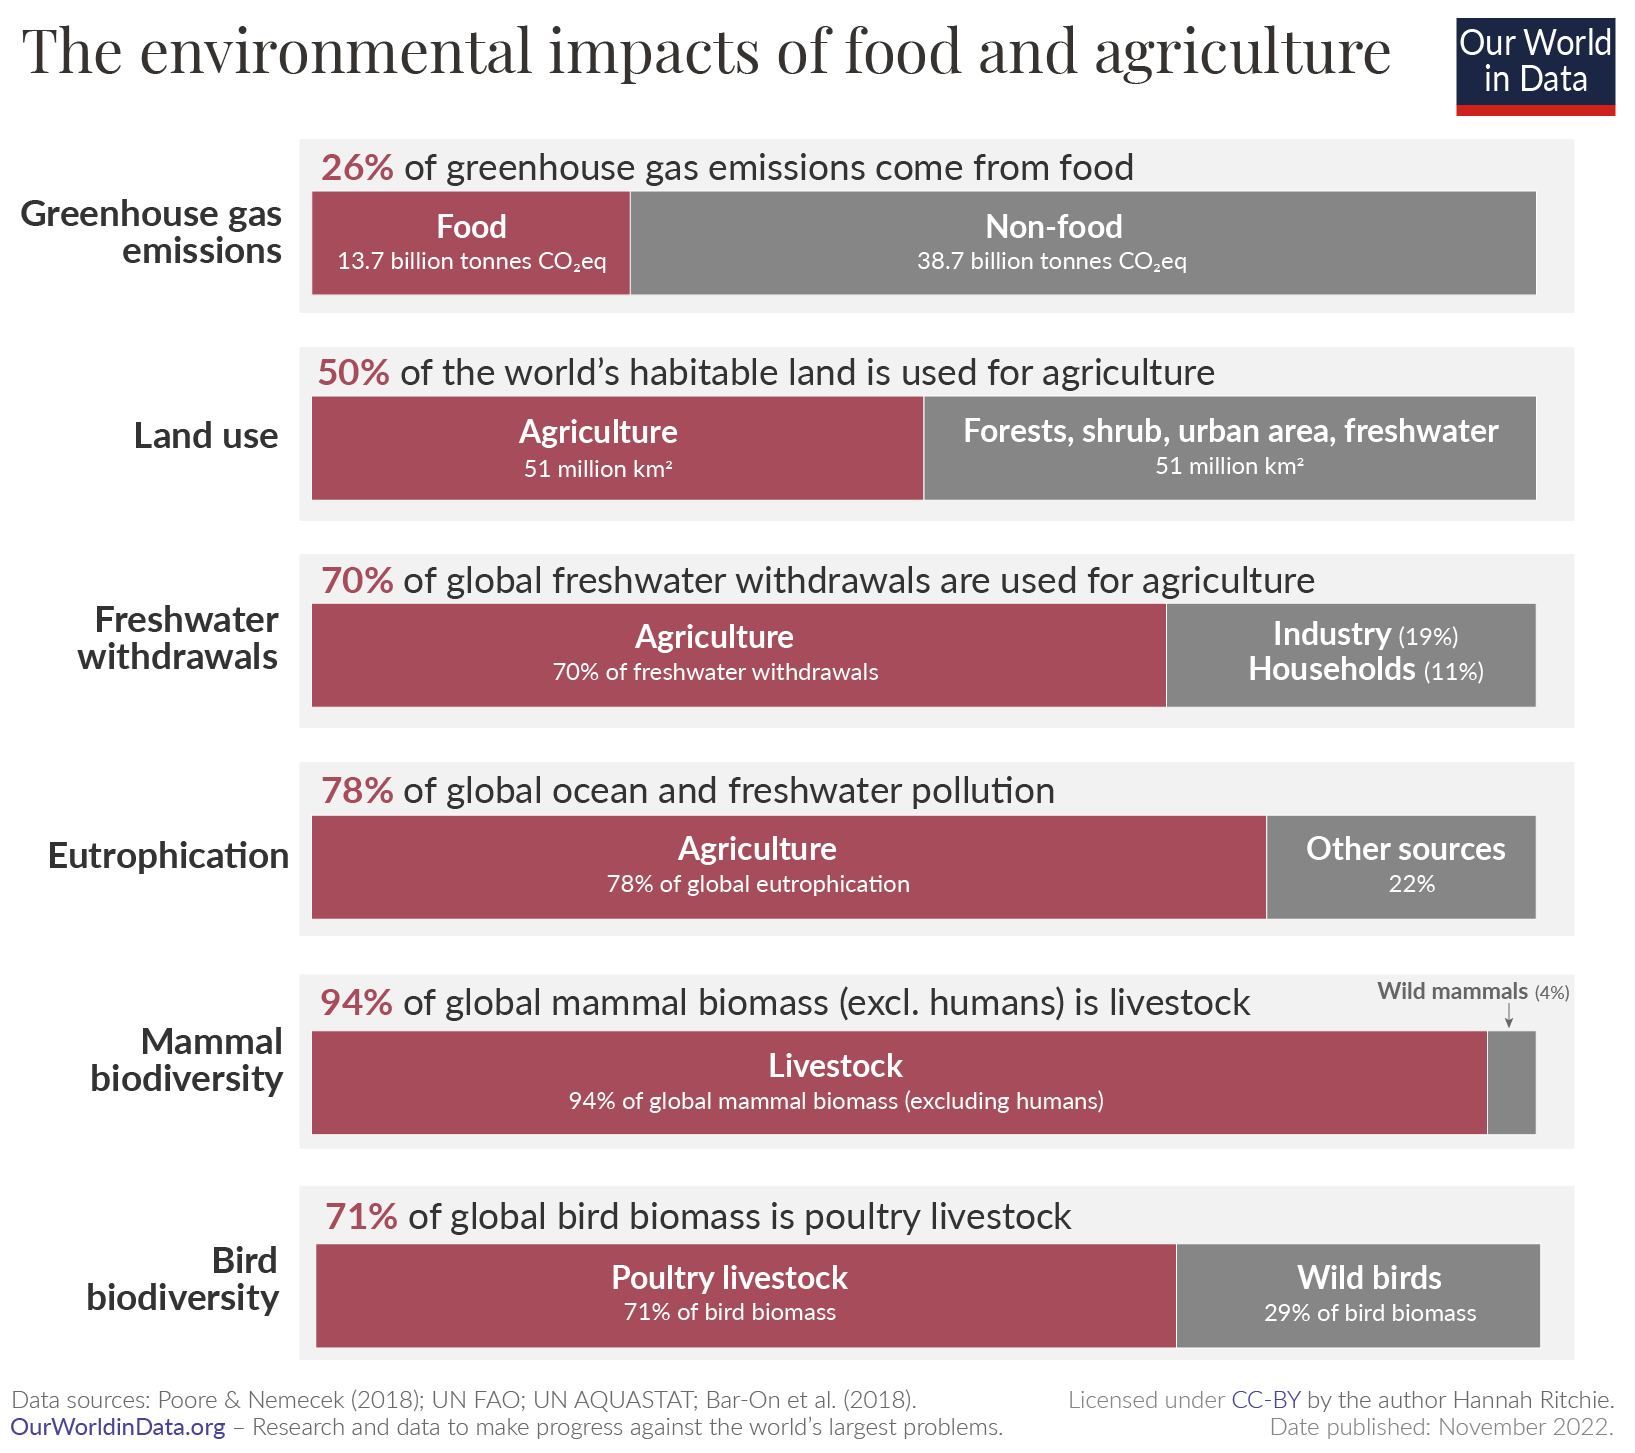

# 2: Biggest strides in decreasing CO2 output


In [99]:
output_df = emissions.pivot(index='Entity', columns='Year', values='Annual CO₂ emissions')
capita_output_df =  capita.pivot(index='Entity', columns='Year', values='Annual CO₂ emissions (per capita)')

# Select only last 30 years
output_df = output_df.drop(columns = output_df.columns[:-31])
capita_output_df = capita_output_df.drop(columns = capita_output_df.columns[:-31])

# Relative change between 1991 and 2021
output_df['change'] = (output_df.loc[:, 2021] - output_df.loc[:, 1991])
output_df['relative'] = (output_df.loc[:, 'change'] / output_df.loc[:, 1991]) * 100

capita_output_df['change'] = (capita_output_df.loc[:, 2021] - capita_output_df.loc[:, 1991])
capita_output_df['relative'] = (capita_output_df.loc[:, 'change'] / capita_output_df.loc[:, 1991]) * 100

# Sort from big to small 
big_change = output_df.sort_values("relative")
capita_big_change = capita_output_df.sort_values("relative")

# big_change['country'] = big_change.index
capita_big_change['country'] = capita_big_change.index


capita_big_change.sort_values("relative").head()

Year,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2015,2016,2017,2018,2019,2020,2021,change,relative,country
Entity,,,,,,,,,,,,,,,,,,,,,
Kuwait,367.927920,18.294262,29.709675,33.651417,32.980118,29.303770,31.036915,28.336819,28.668217,27.590618,...,23.651518,25.171660,23.258196,22.478844,23.498793,22.882670,24.972116,-342.955804,-93.212770,Kuwait
Moldova,6.576870,4.667079,3.526229,2.772321,2.556556,2.638051,1.661740,1.480139,1.088430,0.840384,...,1.459015,1.520459,1.641404,1.733205,1.765773,1.701957,1.829657,-4.747214,-72.180437,Moldova
French Guiana,6.848721,6.665894,6.828456,5.842478,5.276881,4.195408,3.765573,4.285594,3.310401,3.106944,...,2.724782,2.725494,2.624028,2.540044,2.534105,2.238595,2.189799,-4.658923,-68.026164,French Guiana
Democratic Republic of Congo,0.084222,0.073260,0.067263,0.040909,0.048598,0.052383,0.041842,0.036071,0.027896,0.018363,...,0.035505,0.024734,0.029352,0.028385,0.028980,0.026740,0.027183,-0.057039,-67.724420,Democratic Republic of Congo
Somalia,0.105097,0.105900,0.096730,0.090436,0.081695,0.076002,0.069639,0.063667,0.058558,0.055035,...,0.045787,0.044605,0.042891,0.041369,0.039893,0.034968,0.035766,-0.069331,-65.968200,Somalia


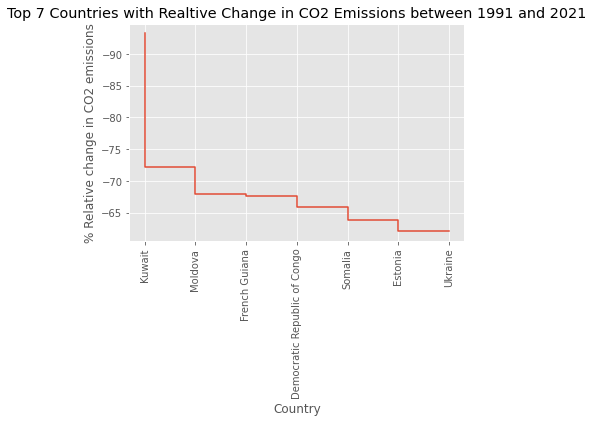

In [103]:
x = capita_big_change.iloc[0:7, -1]
y = capita_big_change.iloc[0:7, -2]

plt.gca().invert_yaxis()
plt.step(x,y)


plt.xticks(rotation = 90)
plt.xlabel("Country")
plt.ylabel("% Relative change in CO2 emissions")
plt.title("Top 7 Countries with Realtive Change in CO2 Emissions between 1991 and 2021")
plt.show()

# 3: Best future price for non-fossil fuel energy


In [125]:
# cost
# cost.drop(columns = 'Code', inplace = True)
cost.columns = ['Country', 'Year', 'Bioenergy', 'Geothermal', 'Offshore_wind', 'Solar_photovoltaic', 'Solar_concentrated', 'Hydropower', 'Onshore_wind']

world_cost = cost[cost['Country'].str.contains('World')]
world_cost = world_cost.dropna()

In [154]:
x = world_cost.Year
bio = world_cost.Bioenergy
geo = world_cost.Geothermal
offshorew = world_cost.Offshore_wind
solarp = world_cost.Solar_photovoltaic
solarc = world_cost.Solar_concentrated
hydro = world_cost.Hydropower
onshorew = world_cost.Onshore_wind


x = x.values.reshape(11, 1)
bio = bio.values.reshape(11, 1)
geo= geo.values.reshape(11, 1)
offwind = offshorew.values.reshape(11, 1)
solarp = solarp.values.reshape(11, 1)
solarc = solarc.values.reshape(11, 1)
hydro = hydro.values.reshape(11, 1)
onwind = onshorew.values.reshape(11, 1)




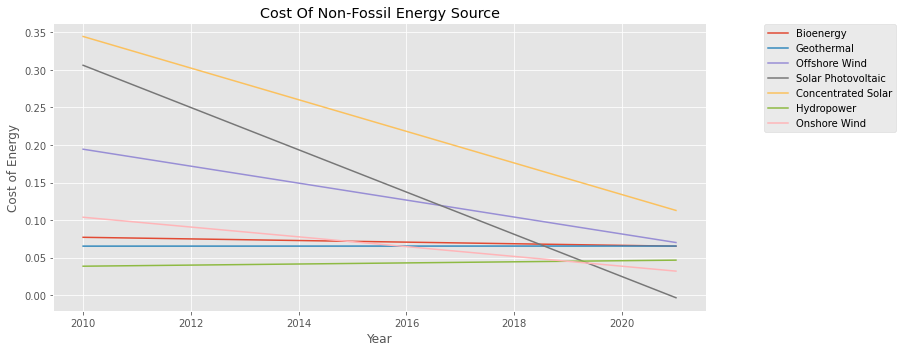

In [155]:
# Regression Types of Energy

regression = LinearRegression()
regression.fit(x, bio)

plt.figure(figsize=(10,5))

regression.fit(x, bio)
plt.plot(x, regression.predict(x) , label="Bioenergy")

regression.fit(x, geo)
plt.plot(x, regression.predict(x), label="Geothermal")

regression.fit(x, offshorew)
plt.plot(x, regression.predict(x), label="Offshore Wind")

regression.fit(x, solarp)
plt.plot(x, regression.predict(x), label="Solar Photovoltaic")

regression.fit(x, solarc)
plt.plot(x, regression.predict(x), label="Concentrated Solar")

regression.fit(x, hydro)
plt.plot(x, regression.predict(x), label="Hydropower")

regression.fit(x, onshorew)
plt.plot(x, regression.predict(x), label="Onshore Wind")

plt.ylabel("Cost of Energy")
plt.xlabel("Year")
plt.title("Cost Of Non-Fossil Energy Source")
plt.tight_layout()
plt.legend(loc='right', bbox_to_anchor=(1.3, 0.81))


Based on the graph above Solar Photocoltaic Energy is the most affordable non fossil fuel source for the future. This does not say that this cannot  change. But based on this data set see a strong decreasing cost price towards the future. 